<a href="https://colab.research.google.com/github/praveentn/hgwxx7/blob/master/transferlearning/obj_detection_frcnn_resnet_detecto_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install detecto

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


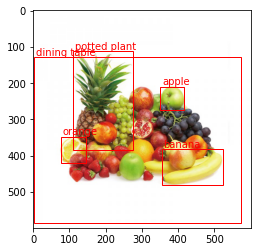

In [2]:
from detecto import core, utils, visualize

image = utils.read_image('https://www.hellocig.com/media/catalog/product/cache/1/image/600x/9df78eab33525d08d6e5fb8d27136e95/f/r/fruits_1.jpg')
model = core.Model()

labels, boxes, scores = model.predict_top(image)
visualize.show_labeled_image(image, boxes, labels)

In [3]:
import torch

print(torch.cuda.is_available())

True


In [4]:
import os
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

os.chdir('/content/drive/My Drive/Detecto Tutorial')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
pwd

'/content/drive/My Drive/Detecto Tutorial'

In [6]:
#!git clone https://github.com/praveentn/images.git

Cloning into 'images'...
remote: Enumerating objects: 233, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 233 (delta 142), reused 226 (delta 135), pack-reused 0
Receiving objects: 100% (233/233), 3.57 MiB | 20.77 MiB/s, done.
Resolving deltas: 100% (142/142), done.


In [7]:
ls

02085620/


In [8]:
cd 02085620

/content/drive/My Drive/Detecto Tutorial/02085620


In [9]:
ls

images/  train_labels/  val_labels/


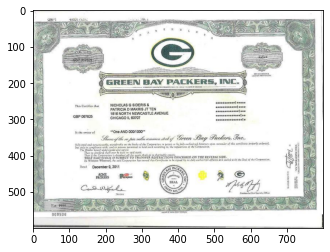

In [11]:
import matplotlib.pyplot as plt
from detecto.utils import read_image

image = read_image('/content/drive/My Drive/Detecto Tutorial/02085620/images/007.jpg')
plt.imshow(image)
plt.show()

In [0]:
# TODO: Change this to your Drive folder location
WORKING_DIRECTORY = '/content/drive/My Drive/Detecto Tutorial/02085620'

os.chdir(WORKING_DIRECTORY)

In [13]:
pwd

'/content/drive/My Drive/Detecto Tutorial/02085620'

In [0]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

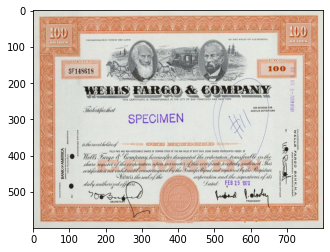

In [15]:
image = utils.read_image('images/1001.jpg')
plt.imshow(image)
plt.show()

In [16]:
# Do this twice: once for our training labels and once for our validation labels
utils.xml_to_csv('train_labels', 'train.csv')
utils.xml_to_csv('val_labels', 'val.csv')

,filename,width,height,class,xmin,ymin,xmax,ymax
0,1001.jpg,800,600,signature,152,472,324,576
1,1001.jpg,800,600,signature,499,482,658,548
2,1001.jpg,800,600,stamp,347,453,460,582
3,1001.jpg,800,600,shares,644,150,700,172
4,1001.jpg,800,600,issuer,135,206,659,242
5,1002.jpg,800,600,issuer,172,216,630,263
6,1002.jpg,800,600,shares,597,153,635,177
7,1002.jpg,800,600,signature,179,462,304,506
8,1002.jpg,800,600,signature,475,468,638,502
9,1002.jpg,800,600,stamp,339,443,470,584


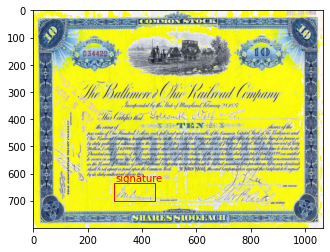

In [17]:
# Specify a list of transformations for our dataset to apply on our images
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    #transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

dataset = core.Dataset('train.csv', 'images/', transform=transform_img)

# dataset[i] returns a tuple containing our transformed image and
# and a dictionary containing label and box data
image, target = dataset[0]

# Show our image along with the box. Note: it may
# be colored oddly due to being normalized by the 
# dataset and then reverse-normalized for plotting
visualize.show_labeled_image(image, target['boxes'], target['labels'])

Epoch 1 of 10
Loss: 12.218600908915201
Epoch 2 of 10
Loss: nan
Epoch 3 of 10
Loss: nan
Epoch 4 of 10
Loss: nan
Epoch 5 of 10
Loss: nan
Epoch 6 of 10
Loss: nan
Epoch 7 of 10
Loss: nan
Epoch 8 of 10
Loss: nan
Epoch 9 of 10
Loss: nan
Epoch 10 of 10
Loss: nan


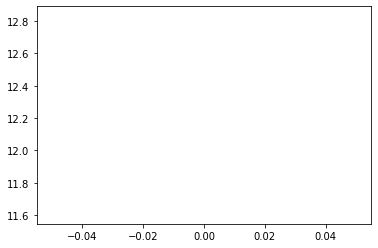

In [18]:
# Create our validation dataset
val_dataset = core.Dataset('val.csv', 'images/')

# Create the loader for our training dataset
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

# Create our model, passing in all unique classes we're predicting
# Note: make sure these match exactly with the labels in the XML/CSV files!
model = core.Model(['issuer', 'shares', 'signature', 'stamp'])

# Train the model! This step can take a while, so make sure you
# the GPU is turned on in Edit -> Notebook settings
losses = model.fit(loader, val_dataset, epochs=10, verbose=True)

# Plot the accuracy over time
plt.plot(losses)
plt.show()

In [19]:
# Specify the path to your image
image = utils.read_image('images/1002.jpg')
predictions = model.predict(image)

# predictions format: (labels, boxes, scores)
labels, boxes, scores = predictions

# ['alien', 'bat', 'bat']
print(labels) 

#           xmin       ymin       xmax       ymax
# tensor([[ 569.2125,  203.6702, 1003.4383,  658.1044],
#         [ 276.2478,  144.0074,  579.6044,  508.7444],
#         [ 277.2929,  162.6719,  627.9399,  511.9841]])
print(boxes)

# tensor([0.9952, 0.9837, 0.5153])
print(scores)

RuntimeError: ignored

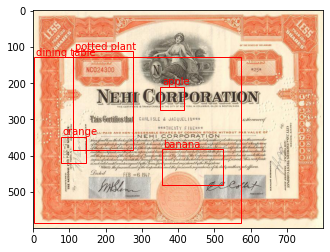

In [20]:
visualize.show_labeled_image(image, boxes, labels)